# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV844"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 20

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
1894,KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION,844,0.801124,0.000126,0.001347


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP059039, SRP032789, SRP027015, SRP055569, SRP050892, SRP064464, SRP059643, SRP028336, SRP058181, SRP003726, SRP050499, SRP042161, SRP056477, SRP006970, SRP048759, SRP058237, SRP057196, SRP039397, SRP027258, SRP058722, SRP041538, SRP007412, SRP045639, SRP060416, SRP060355, SRP034634, SRP019241, SRP043378, SRP056295, SRP030628, SRP032989, SRP059733, SRP059775, SRP042620, SRP051606, SRP052491, SRP041825, SRP056604, SRP017942, SRP063840, SRP018719, SRP059732, SRP066834, SRP020493, SRP029367, SRP057852, SRP018359, SRP026042, SRP044668, SRP004837, SRP050493, SRP009266, SRP063834, SRP056049, SRP056074, SRP010430, SRP012015, SRP052615, SRP018778, SRP023270, SRP035417, SRP028594, SRP033135, SRP032775, SRP004847, SRP056835, SRP050223, SRP050272, SRP014540, SRP056733, SRP032812, SRP043434, SRP008218, SRP044042, SRP014213, SRP010038, SRP033266, SRP029880, SRP012461, SRP027364, SRP040300, SRP056840, SRP043417, SRP019936, SRP050000, SRP060715, SRP039591, SRP058571, SRP028301, SRP021130, SRP026537,

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (90 != 91)
  warnings.warn(


In [18]:
lv_data.shape

(9532, 120)

In [19]:
lv_data.head()

age     group organisms  severity  \
project   run                                                             
SRP059039 SRR2049587  2 year-old or older   Control      EPEC   Control   
          SRR2049621  2 year-old or older  Diarrhea      DAEC      mild   
          SRR2049622  2 year-old or older  Diarrhea      DAEC      mild   
          SRR2049620          <2 year-old  Diarrhea      DAEC  moderate   
          SRR2049619          <2 year-old  Diarrhea      DAEC      mild   

                           tissue flowcell lane tumor type cycloheximide  \
project   run                                                              
SRP059039 SRR2049587  Whole blood        A    8        NaN           NaN   
          SRR2049621  Whole blood        A    6        NaN           NaN   
          SRR2049622  Whole blood        A    7        NaN           NaN   
          SRR2049620  Whole blood        A    6        NaN           NaN   
          SRR2049619  Whole blood        A    5        NaN           NaN   

                     time point  ... patient code name barcode cancer type  \
project   run                    ...                                         
SRP059039 SRR2049587        NaN  ...               NaN     NaN    NaN  NaN   
          SRR2049621        NaN  ...               NaN     NaN    NaN  NaN   
          SRR2049622        NaN  ...               NaN     NaN    NaN  NaN   
          SRR2049620        NaN  ...               NaN     NaN    NaN  NaN   
          SRR2049619        NaN  ...               NaN     NaN    NaN  NaN   

                     sirs outcomes sirs vs sepsis karyotype  \
project   run                                                 
SRP059039 SRR2049587           NaN            NaN       NaN   
          SRR2049621           NaN            NaN       NaN   
          SRR2049622           NaN            NaN       NaN   
          SRR2049620           NaN            NaN       NaN   
          SRR2049619           NaN            NaN       NaN   

                     library prep protocol disease group     LV844  
project   run                                                       
SRP059039 SRR2049587                   NaN           NaN  0.014828  
          SRR2049621                   NaN           NaN  0.015448  
          SRR2049622                   NaN           NaN  0.008934  
          SRR2049620                   NaN           NaN  0.004668  
          SRR2049619                   NaN           NaN  0.005130  

[5 rows x 120 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

cycloheximide         0.288121
mg/etoh treatment     0.188234
sample type           0.157820
tumor type            0.141655
age (days)            0.104927
etoh/dox treatment    0.089686
infected construct    0.089686
replicates            0.077798
organisms             0.036800
severity              0.036800
group                 0.036800
flowcell              0.036800
lane                  0.036800
cell marker           0.034485
hypoxia exposure      0.030917
time point            0.030489
sampling time         0.029681
treated with          0.028432
age (years)           0.026664
strain/background     0.026664
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

tissue         0.006265
cell type      0.004969
tissue type    0.000990
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                             
SRP059039 SRR2049646                                NaN   
SRP032789 SRR1027188                                NaN   
SRP059039 SRR2049631                                NaN   
SRP027015 SRR931822                                 NaN   
          SRR931824                                 NaN   
          SRR931820                                 NaN   
SRP055569 SRR2019079  WI-38 human lung fibroblast cells   
SRP027015 SRR931821                                 NaN   
SRP050892 SRR1696121                                NaN   
SRP064464 SRR2558125                                NaN   
SRP059643 SRR2069999                                NaN   
SRP050892 SRR1696122                                NaN   
SRP028336 SRR945249                                 NaN   
SRP058181 SRR2015776                                NaN   
SRP003726 SRR067902                     epithelial cell   
SRP050499 SRR2013751                                NaN   
SRP028336 SRR945248                                 NaN   
SRP059039 SRR2049734                                NaN   
SRP050499 SRR2013745                                NaN   
SRP059643 SRR2070001                                NaN   
          SRR2069998                                NaN   
SRP042161 SRR1295005                       Glioblastoma   
SRP059643 SRR2069996                                NaN   
SRP042161 SRR1294737                       Glioblastoma   
SRP056477 SRR1927021                                NaN   

                                             tissue tissue type     LV844  
project   run                                                              
SRP059039 SRR2049646                    Whole blood         NaN  2.083566  
SRP032789 SRR1027188                            NaN         NaN  1.688522  
SRP059039 SRR2049631                    Whole blood         NaN  1.585082  
SRP027015 SRR931822                             NaN         NaN  1.566637  
          SRR931824                             NaN         NaN  1.497305  
          SRR931820                             NaN         NaN  1.147552  
SRP055569 SRR2019079                            NaN         NaN  1.136869  
SRP027015 SRR931821                             NaN         NaN  1.043119  
SRP050892 SRR1696121                            NaN         NaN  1.031115  
SRP064464 SRR2558125                            NaN         NaN  0.963351  
SRP059643 SRR2069999                            NaN         NaN  0.930991  
SRP050892 SRR1696122                            NaN         NaN  0.923006  
SRP028336 SRR945249               cerebellar cortex         NaN  0.910885  
SRP058181 SRR2015776  brain (BA9 prefrontal cortex)         NaN  0.900904  
SRP003726 SRR067902                          breast         NaN  0.887033  
SRP050499 SRR2013751                            NaN         NaN  0.866832  
SRP028336 SRR945248               cerebellar cortex         NaN  0.856545  
SRP059039 SRR2049734                    Whole blood         NaN  0.850254  
SRP050499 SRR2013745                            NaN         NaN  0.836880  
SRP059643 SRR2070001                            NaN         NaN  0.835545  
          SRR2069998                            NaN         NaN  0.822161  
SRP042161 SRR1295005                            NaN         NaN  0.803755  
SRP059643 SRR2069996                            NaN         NaN  0.785900  
SRP042161 SRR1294737                            NaN         NaN  0.780528  
SRP056477 SRR1927021                     Cerebellum         NaN  0.778349

In [25]:
# what is there in these projects?
lv_data.loc[["SRP059039"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

age     group   organisms  severity  \
project   run                                                               
SRP059039 SRR2049646          <2 year-old  Diarrhea        EAEC    severe   
          SRR2049631          <2 year-old  Diarrhea        EAEC  moderate   
          SRR2049734          <2 year-old  Diarrhea  Salmonella  moderate   
          SRR2049769  2 year-old or older  Diarrhea    Shigella  moderate   
          SRR2049748          <2 year-old  Diarrhea  Salmonella      mild   
          SRR2049685  2 year-old or older  Diarrhea   Rotavirus      mild   
          SRR2049683          <2 year-old  Diarrhea   Rotavirus      mild   
          SRR2049662          <2 year-old  Diarrhea   Rotavirus    severe   
          SRR2049759  2 year-old or older  Diarrhea    Shigella      mild   
          SRR2049731          <2 year-old  Diarrhea  Salmonella      mild   

                           tissue flowcell lane     LV844  
project   run                                              
SRP059039 SRR2049646  Whole blood        B    1  2.083566  
          SRR2049631  Whole blood        A    3  1.585082  
          SRR2049734  Whole blood        A    6  0.850254  
          SRR2049769  Whole blood        A    8  0.271901  
          SRR2049748  Whole blood        A    4  0.156566  
          SRR2049685  Whole blood        A    8  0.088033  
          SRR2049683  Whole blood        A    8  0.087625  
          SRR2049662  Whole blood        B    1  0.074488  
          SRR2049759  Whole blood        A    1  0.072742  
          SRR2049731  Whole blood        A    6  0.071147

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue", "tumor type"]

## Get plot data

In [85]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [86]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [87]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [88]:
plot_data.head(20)

cell type     LV844
project   run                                                    
SRP059039 SRR2049646                        Whole blood  2.083566
SRP032789 SRR1027188            Normal Breast Organoids  1.688522
SRP059039 SRR2049631                        Whole blood  1.585082
SRP027015 SRR931822                     NOT CATEGORIZED  1.566637
          SRR931824                     NOT CATEGORIZED  1.497305
          SRR931820                     NOT CATEGORIZED  1.147552
SRP055569 SRR2019079  WI-38 human lung fibroblast cells  1.136869
SRP027015 SRR931821                     NOT CATEGORIZED  1.043119
SRP050892 SRR1696121                    NOT CATEGORIZED  1.031115
SRP064464 SRR2558125                    NOT CATEGORIZED  0.963351
SRP059643 SRR2069999                    NOT CATEGORIZED  0.930991
SRP050892 SRR1696122                    NOT CATEGORIZED  0.923006
SRP028336 SRR945249                   cerebellar cortex  0.910885
SRP058181 SRR2015776      brain (BA9 prefrontal cortex)  0.900904
SRP003726 SRR067902                     epithelial cell  0.887033
SRP050499 SRR2013751                    NOT CATEGORIZED  0.866832
SRP028336 SRR945248                   cerebellar cortex  0.856545
SRP059039 SRR2049734                        Whole blood  0.850254
SRP050499 SRR2013745                    NOT CATEGORIZED  0.836880
SRP059643 SRR2070001                    NOT CATEGORIZED  0.835545

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [89]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma cells + lung fibroblast cells",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma cells + breast cancer cells",
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [90]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [91]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [92]:
_srp_code = "SRP027015"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Peripheral blood (Myeloma / MM.1S)",
    # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [93]:
_srp_code = "SRP050499"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Primordial germ cells (PGC)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [94]:
# add also tissue information to these projects
_srp_code = "SRP050892"

_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Cell types from brain"
    + f" ({lv_data.loc[(_srp_code, x.name), 'screening chemicals']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [95]:
# I don't know the cell type of this: https://trace.ncbi.nlm.nih.gov/Traces/index.html?view=study&acc=SRP059643
# there are some samples that have high values, but it is impossible to know the cell types/cell lines (three were used in the study)
final_plot_data = final_plot_data.drop(("SRP059643",))

In [96]:
# final_plot_data[SELECTED_ATTRIBUTE] = final_plot_data.apply(
#     lambda x: "Myeloma cells" if x.name[0] in ("SRP027015",) else x["cell type"],
#     axis=1,
# )

In [97]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [98]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [99]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [100]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [101]:
len(attr_order)

20

In [102]:
attr_order[:5]

['Whole blood',
 'Normal Breast Organoids',
 'Peripheral blood (Myeloma / MM.1S)',
 'WI-38 human lung fibroblast cells',
 'Cell types from brain (Cadmium)']

## Plot

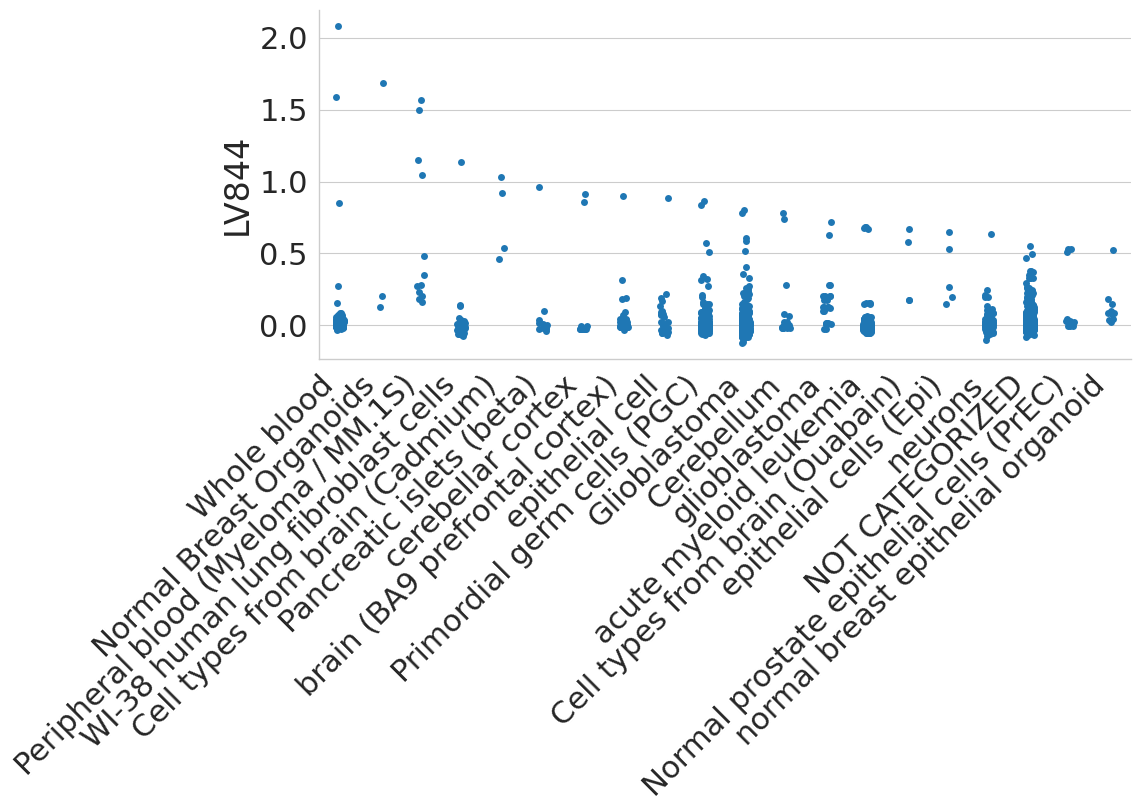

In [103]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [43]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [83]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("NOT CAT")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV844
project   run                                  
SRP059643 SRR2069999  NOT CATEGORIZED  0.930991
          SRR2070001  NOT CATEGORIZED  0.835545
          SRR2069998  NOT CATEGORIZED  0.822161
          SRR2069996  NOT CATEGORIZED  0.785900
          SRR2069997  NOT CATEGORIZED  0.747243
          SRR2070000  NOT CATEGORIZED  0.730205
SRP039397 SRR1182595  NOT CATEGORIZED  0.549734
SRP007412 SRR306844   NOT CATEGORIZED  0.496199
SRP039397 SRR1182593  NOT CATEGORIZED  0.469808
SRP043378 SRR1425073  NOT CATEGORIZED  0.378010
          SRR1425075  NOT CATEGORIZED  0.377215
          SRR1425076  NOT CATEGORIZED  0.373575
          SRR1425072  NOT CATEGORIZED  0.348790
SRP030628 SRR1004287  NOT CATEGORIZED  0.335289
SRP043378 SRR1425077  NOT CATEGORIZED  0.331235
SRP032989 SRR1029601  NOT CATEGORIZED  0.329839
SRP043378 SRR1425074  NOT CATEGORIZED  0.327935
SRP059733 SRR2072593  NOT CATEGORIZED  0.325867
SRP059775 SRR2074784  NOT CATEGORIZED  0.296748
SRP017942 SRR648670   NOT CATEGORIZED  0.263897

In [64]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP059643"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

etoh/dox treatment       infected construct  \
project   run                                                      
SRP059643 SRR2069999               EtOH   pInducer21-MYC-Swap-HA   
          SRR2070001               EtOH     pInducer21-MYC-WT-HA   
          SRR2069998                Dox   pInducer21-MYC-Swap-HA   
          SRR2069996                Dox  pInducer21-MYC-Kless-HA   
          SRR2069997               EtOH  pInducer21-MYC-Kless-HA   
          SRR2070000                Dox     pInducer21-MYC-WT-HA   
          SRR2939553                NaN                      NaN   
          SRR2939549                NaN                      NaN   
          SRR2939555                NaN                      NaN   
          SRR2939546               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069983                Dox         pInducer21-empty   
          SRR2939544               EtOH   pInducer21-MYC-K52o-HA   
          SRR2939548                Dox     pInducer21-MYC-WT-HA   
          SRR2939554                NaN                      NaN   
          SRR2939545                Dox  pInducer21-MYC-Kless-HA   
          SRR2939550                NaN                      NaN   
          SRR2939552                NaN                      NaN   
          SRR2069978                Dox         pInducer21-empty   
          SRR2069981                Dox  pInducer21-MYC-Kless-HA   
          SRR2939539               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069993               EtOH   pInducer21-MYC-Swap-HA   
          SRR2069991               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069990                Dox  pInducer21-MYC-Kless-HA   
          SRR2069985               EtOH     pInducer21-MYC-WT-HA   
          SRR2069977               EtOH  pInducer21-MYC-Kless-HA   
          SRR2939535                Dox  pInducer21-MYC-Kless-HA   
          SRR2939538                Dox     pInducer21-MYC-WT-HA   
          SRR2069982               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069987               EtOH     pInducer21-MYC-WT-HA   
          SRR2939551                NaN                      NaN   
          SRR2069976                Dox  pInducer21-MYC-Kless-HA   
          SRR2939536               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069980               EtOH     pInducer21-MYC-WT-HA   
          SRR2069995               EtOH     pInducer21-MYC-WT-HA   
          SRR2939543                Dox   pInducer21-MYC-K52o-HA   
          SRR2069989               EtOH     pInducer21-MYC-WT-HA   
          SRR2939540                Dox  pInducer21-MYC-Kless-HA   
          SRR2939542                Dox     pInducer21-MYC-WT-HA   
          SRR2939547               EtOH     pInducer21-MYC-WT-HA   
          SRR2069994                Dox     pInducer21-MYC-WT-HA   
          SRR2069988                Dox     pInducer21-MYC-WT-HA   
          SRR2069986                Dox     pInducer21-MYC-WT-HA   
          SRR2069984                Dox     pInducer21-MYC-WT-HA   
          SRR2939537                Dox     pInducer21-MYC-WT-HA   
          SRR2069992                Dox   pInducer21-MYC-Swap-HA   
          SRR2069979                Dox     pInducer21-MYC-WT-HA   
          SRR2939541               EtOH     pInducer21-MYC-WT-HA   

                     mg/etoh treatment replicates    sirna     LV844  
project   run                                                         
SRP059643 SRR2069999              EtOH          1      NaN  0.930991  
          SRR2070001              EtOH          1      NaN  0.835545  
          SRR2069998              EtOH          1      NaN  0.822161  
          SRR2069996              EtOH          1      NaN  0.785900  
          SRR2069997              EtOH          1      NaN  0.747243  
          SRR2070000              EtOH          1      NaN  0.730205  
          SRR2939553               NaN          2  siCDC73 -0.002303  
          SRR2939549               NaN          1

In [106]:
_tmp.iloc[0]["sample type"]

'undifferentiated Epstein-Barr virus (EBV)-positive NPC xenograft'

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )